In [5]:
import pandas as pd

#loading dataset 

df = pd.read_csv('ad.csv')
df.head()

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#Dropping values from dataset
#'inplace' means changes happens in the same dataset we are working on

df.drop(['index','radio','newspaper'],inplace=True,axis=1)
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [9]:
#Making x and y axis 
#The X-axis will have TV values in it 
#The Y-axis will have sales values in it

X = df.drop(['sales'], axis=1)
y = df['sales']
print(X[:5])
print(y[:5])

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [11]:
#we will know split the dataset according to our need
# default split is 75% for training and 25% for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1) 

#printing the details of our dataset after splitting 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 1)
(50, 1)
(150,)
(50,)


In [12]:
#importing Linear Regression Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#fitting our model
reg.fit(x_train, y_train)

LinearRegression()

In [13]:
#Let's get the slope and intercept of our linear regression line 

print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

Slope:  [0.04802945]
Intercept:  6.91197261886872


In [14]:
print("y = 0.0480x + 6.9119")
#this is our simple linear regression line

y = 0.0480x + 6.9119


In [15]:
#let's make predictions on our testing dataset 

y_pred = reg.predict(x_test)

#printing only first 5 values of the array 
print(y_pred[:5])

[17.03658069 16.63793625 11.50839099 20.36982452 19.10184704]


In [16]:
#let's see what were the values in the dataset for our testing dataset

print(y_test[:5])

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64


/var/folders/kb/2qtwss7n3y3091dclgrcn9hm0000gn/T/ipykernel_28644/1861016953.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [17]:
#writing function to predict random values for us


def myfunc(TV):
  Y =  6.91197261886872 + 0.04802945*TV 
  return Y
predictedsales = myfunc(39.5)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  8.80913589386872


In [18]:
#let's get the error in prediction values 

from sklearn.metrics import mean_squared_error,mean_absolute_error 
import numpy as np

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error = ",mae)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error = ",mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  2.4643080986027908
Mean Squared Error =  10.310069587813155
Root Mean Squared Error =  3.210929707703542


In [19]:
#Regression score - telling us how good our model is!
reg.score(X, y)

0.6117236700337467

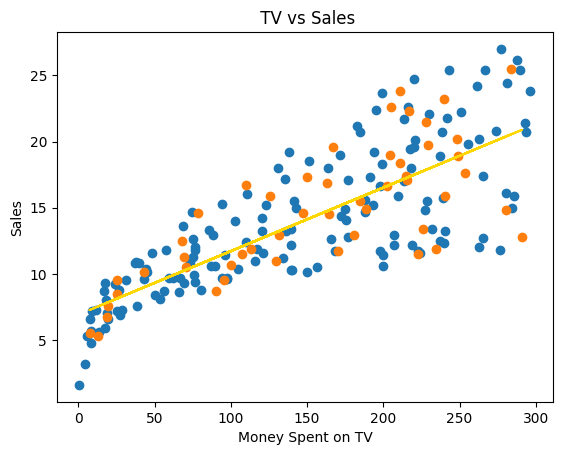

In [24]:
#plotting graph for the model

import matplotlib.pyplot as plt

#plotting out our traing dataset x,y values 
plt.scatter(x_train,y_train)

#plotting out our testing dataset x,y values 
plt.scatter(x_test,y_test)


plt.xlabel("Money Spent on TV")
plt.ylabel("Sales")
plt.title(" TV vs Sales")


plt.plot(x_test,y_pred,c='gold')